# Chapter 1 - Ordinary Least Squares (OLS)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.2.3-Simulation-of-the-causal-effect" data-toc-modified-id="1.2.3-Simulation-of-the-causal-effect-1">1.2.3 Simulation of the causal effect</a></span></li><li><span><a href="#1.2.4-Averaging-to-Estimate-the-Causal-Effect" data-toc-modified-id="1.2.4-Averaging-to-Estimate-the-Causal-Effect-2">1.2.4 Averaging to Estimate the Causal Effect</a></span></li><li><span><a href="#1.3.2-Algebraic-OLS-estimator-in-Python" data-toc-modified-id="1.3.2-Algebraic-OLS-estimator-in-Python-3">1.3.2 Algebraic OLS estimator in Python</a></span></li><li><span><a href="#1.3.4-Multiplying-matrices-in-Python" data-toc-modified-id="1.3.4-Multiplying-matrices-in-Python-4">1.3.4 Multiplying matrices in Python</a></span></li><li><span><a href="#1.3.6-Matrix-estimator-of-OLS-in-Python" data-toc-modified-id="1.3.6-Matrix-estimator-of-OLS-in-Python-5">1.3.6 Matrix estimator of OLS in Python</a></span></li><li><span><a href="#1.4.3-Estimating-least-squares-in-Python" data-toc-modified-id="1.4.3-Estimating-least-squares-in-Python-6">1.4.3 Estimating least squares in Python</a></span></li><li><span><a href="#1.4.4-Linear-regression-in-Python" data-toc-modified-id="1.4.4-Linear-regression-in-Python-7">1.4.4 Linear regression in Python</a></span><ul class="toc-item"><li><span><a href="#scipy-solution" data-toc-modified-id="scipy-solution-7.1">scipy solution</a></span></li><li><span><a href="#sklearn-solution" data-toc-modified-id="sklearn-solution-7.2">sklearn solution</a></span></li><li><span><a href="#statsmodels-solution" data-toc-modified-id="statsmodels-solution-7.3">statsmodels solution</a></span></li></ul></li><li><span><a href="#1.5.1.-Data-simulations" data-toc-modified-id="1.5.1.-Data-simulations-8">1.5.1. Data simulations</a></span></li><li><span><a href="#1.5.3-Bootstrap-in-Python" data-toc-modified-id="1.5.3-Bootstrap-in-Python-9">1.5.3 Bootstrap in Python</a></span></li><li><span><a href="#1.6.2-NLSM-data" data-toc-modified-id="1.6.2-NLSM-data-10">1.6.2 NLSM data</a></span></li><li><span><a href="#1.6.3-Plotting-returns-to-schooling" data-toc-modified-id="1.6.3-Plotting-returns-to-schooling-11">1.6.3 Plotting returns to schooling</a></span></li><li><span><a href="#1.6.4-Estimating-returns-to-schooling" data-toc-modified-id="1.6.4-Estimating-returns-to-schooling-12">1.6.4 Estimating returns to schooling</a></span></li></ul></div>

## 1.2.3 Simulation of the causal effect

In [4]:
# setting the seed in Numpy
# as the function to generate seeds differ in Python and R, 
# (and actually even between plain Python and Numpy)
# we will generate differents random data than in the book.
import numpy as np
np.random.seed(123456789)

# main parameters of interest
N = 100
a = 2
b = 3

# create a vector where the observed characteristic, x, is drawn 
# from a uniform distribution
x = np.random.rand(N)

# create a vector for the unobserved characteristic, u, from
# a standard normal distribution
u = np.random.normal(size = N)

# create a vector y
y = a + b*x + u

 ## 1.2.4 Averaging to Estimate the Causal Effect

In [5]:
# as there is no simple way to plot linear function in Python, 
# we create a dedicated function for it

# credits to David Marx https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib/43811762

def abline(slope, intercept):
    """Plot a linear function from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color='dimgray')

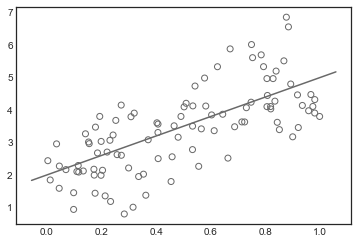

In [6]:
import matplotlib.pyplot as plt

# plotting with have a R-looking plotting style
plt.style.use('seaborn-white')
plt.scatter(x,y, facecolors='none', color = 'dimgray')
abline(intercept = 2, slope = 3)

In [7]:
# means takes an average
# the logical expression inside the square brackets
# creates an index for the elements of y where the logical
# expression in x holds

# in Python mean can be found in the Numpy library

np.mean(y[x>0.95])-np.mean(y[x<0.05])

1.8767549243835857

## 1.3.2 Algebraic OLS estimator in Python

In [8]:
b_hat = (np.mean(y)-2)/np.mean(x)
b_hat

2.8406050244844363

## 1.3.4 Multiplying matrices in Python

In [9]:
x1 = x[0:5] # python start counting at 0 and not at 1 like R

In [10]:
# concatenating the two vectors in a matrix
X1 = np.c_[np.ones(5),x1]

In [11]:
# predicts value of y using the model
X1.dot(np.array([2,3]))
# [2,3] has to be passed through the array() function to get
# reconise as a matrix

array([3.59849907, 3.6024098 , 3.52865911, 4.1406921 , 2.77099686])

In [12]:
# which we can compare to the true values
y[0:5]

array([2.78002865, 4.12492526, 4.20554113, 3.63215153, 2.62481107])

## 1.3.6 Matrix estimator of OLS in Python

In [13]:
X  = np.c_[np.ones(N),x]

In [14]:
# creation of a matrix
A = np.matrix('1 4; 2 5;3 6') # or np.c_[range(1,4), range(4,7)]

In [15]:
# transpose of A
np.transpose(A)

matrix([[1, 2, 3],
        [4, 5, 6]])

In [16]:
# mutiplication of the transpose by itself
np.transpose(A).dot(A) 

matrix([[14, 32],
        [32, 77]])

In [17]:
# in our problem
np.transpose(X).dot(X) 

array([[100.        ,  49.3476701 ],
       [ 49.3476701 ,  33.08688716]])

In [18]:
# in python the inverse matrix can be found using
# the inv() function (from Numpy)
np.linalg.inv( np.transpose(X).dot(X) )

array([[ 0.03787869, -0.05649443],
       [-0.05649443,  0.11448247]])

In [19]:
beta_hat = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y) 
beta_hat

array([1.89849254, 3.04630362])

In [20]:
# we averaged over the unobserved term to get something close to 0.
np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(u) 

array([-0.10150746,  0.04630362])

## 1.4.3 Estimating least squares in Python

In [21]:
from scipy.optimize import minimize

def f(b):
    "The objective function - sum of squared difference function"
    return sum((y-2-b*x)**2)

# the minimise function needs an initial guess
x0 = 1
# we search in the real line from -10 to 10
bounds = [(-10,10)]

# minizing the objective function
minimize(f, x0, bounds = bounds)

      fun: 81.42945116260965
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.26325641e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 1
   status: 0
  success: True
        x: array([2.89490967])

In [22]:
# alternatively using the first order condition
(np.mean(x*y)-2*np.mean(x))/np.mean(x*x)

2.894909599064989

## 1.4.4 Linear regression in Python

In [23]:
import pandas as pd
data1 = pd.DataFrame(np.c_[y,x])
data1.columns=['y','x']
data1

,y,x
0,2.780029,0.532833
1,4.124925,0.534137
2,4.205541,0.509553
3,3.632152,0.713564
4,2.624811,0.256999
...,...,...
95,4.446394,0.806967
96,4.032417,0.819154
97,3.032040,0.198643
98,3.013838,0.152537


### scipy solution

In [24]:
from scipy import stats
stats.linregress(x,y)

LinregressResult(slope=3.0463036172093023, intercept=1.8984925370520371, rvalue=0.7068947150384254, pvalue=2.0601867106113483e-16, stderr=0.30790773927020265)

### sklearn solution

In [25]:
from sklearn import linear_model

# create linear regression object
regr = linear_model.LinearRegression()

# fit
regr.fit(x.reshape(-1, 1), y) 
# since the x is unidimentionnal the sklearn API imposes
# to reshape it before using the fit() function

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [3.04630362]
Intercept: 
 1.898492537052036


### statsmodels solution

In [27]:
import statsmodels.api as sm

# we add an intercept
X = sm.add_constant(x)

mod = sm.OLS(y,X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     97.88
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           2.06e-16
Time:                        18:59:56   Log-Likelihood:                -131.45
No. Observations:                 100   AIC:                             266.9
Df Residuals:                      98   BIC:                             272.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8985      0.177     10.719      0.000       1.547       2.250
x1             3.0463      0.308      9.894      0.000       2.435       3.657
==============================================================================
Omnibus:                        0.968   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                1.066
Skew:                           0.178   Prob(JB):                        0.587
Kurtosis:                       2.642   Cond. No.                         4.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# result from the matrix algebra
np.transpose(beta_hat)

array([1.89849254, 3.04630362])

## 1.5.1. Data simulations

In [29]:
np.random.seed(123456789)

K = 1000

# create an empty least to fill with the results of the 
# data simulation
l = []

for k in range(0,K):

    x = np.random.rand(N)
    u = np.random.normal(size = N)
    y = a + b*x + u
    regr = linear_model.LinearRegression()
    regr.fit(x.reshape(-1, 1), y)
    l.append([regr.intercept_, regr.coef_[0]])
    # as we have only one coefficient we access it using 
    # regr.coef_[0]] - first element of a list of 1 coeff

# stacking all the results in a single dataframe
sim_res = pd.DataFrame(l)    
# name the columns of the result matrix
sim_res.columns = ['Est. of a', 'Est. of b']

In [30]:
sim_res.describe()

,Est. of a,Est. of b
count,1000.000000,1000.000000
mean,2.000870,3.003284
std,0.202131,0.347791
min,1.309924,1.941597
25%,1.868414,2.763309
50%,2.008992,3.005861
75%,2.130135,3.237053
max,2.595236,4.148743


## 1.5.3 Bootstrap in Python

In [31]:
np.random.seed(123456789)

K = 1000

l = []

for k in range(0,K):
    
    #index_k = np.random.randint(N+1) # again, Python start counting at 0
    data_k = data1.sample(N+1, replace = True)
    regr = linear_model.LinearRegression()
    regr.fit(np.array(data_k['x']).reshape(-1, 1), data_k['y'])
    l.append([regr.intercept_, regr.coef_[0]])

# stacking all the results in a single dataframe
sim_res = pd.DataFrame(l)
# name the columns of the result matrix
sim_res.columns = ['Est. of a', 'Est. of b']

# bootstrap estimates from the simulation
tab_res = pd.DataFrame()
tab_res['Mean'] = np.mean(sim_res)
tab_res['SD'] = np.std(sim_res)
tab_res['2.5%'] = sim_res.quantile(0.025)
tab_res['97.5%'] = sim_res.quantile(0.975)
tab_res

,Mean,SD,2.5%,97.5%
Est. of a,1.899967,0.149644,1.577033,2.178879
Est. of b,3.038628,0.278047,2.513753,3.611489


In [32]:
# the standard errors can be found in the statsmodel solution

## 1.6.2 NLSM data

In [48]:
df = pd.read_csv("../data/nls.csv") # convention to name any dataset as df in Python

# converting two variables as numbers, errors are coerced into NAs
df['wage76'] = df['wage76'].apply(pd.to_numeric, errors='coerce')
df['lwage76'] = df['lwage76'].apply(pd.to_numeric, errors='coerce')

In [49]:
# create a new dataset with missing values removed
df1 = df[df['lwage76'].isna()==False]

## 1.6.3 Plotting returns to schooling

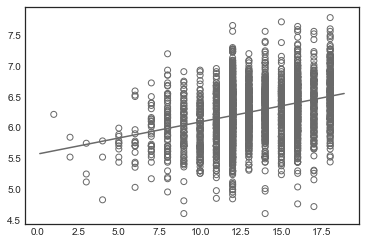

In [61]:
# create linear regression object
regr = linear_model.LinearRegression()

# fit
x = df1['lwage76']
y = np.array(df1['ed76']).reshape(-1, 1) # need to change the datatype
regr.fit(y, x) 

# plotting the dots
plt.scatter(df1['ed76'],
            df1['lwage76'],
            facecolors='none',
            color = 'dimgray')

# and the obtained regression line
abline(intercept = regr.intercept_, slope = regr.coef_[0])

## 1.6.4 Estimating returns to schooling

In [63]:
# unfortunately where is no built-in option in sklearn to get statistical 
# table similar to the R output. 
# here is the result with statsmodel, 
# which in addition as an interface very simiar to R's:

from statsmodels.formula.api  import ols
result = ols(formula = 'lwage76 ~  ed76', data = df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lwage76   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     329.5
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           5.77e-70
Time:                        19:21:02   Log-Likelihood:                -1668.8
No. Observations:                3010   AIC:                             3342.
Df Residuals:                    3008   BIC:                             3354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5709      0.039    143.470      0.000       5.495       5.647
ed76           0.0521      0.003     18.153      0.000       0.046       0.058
==============================================================================
Omnibus:                       23.139   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.345
Skew:                          -0.186   Prob(JB):                     5.17e-06
Kurtosis:                       3.236   Cond. No.                         68.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# predicted percentage increase in wages for one year of schoolings
np.exp(np.log(np.mean(df1['wage76']))+regr.coef_[0])/np.mean(df1)['wage76']

1.053475013724589